# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 11__

__Nombres de los estudiantes: Arturo Ibáñez Martínez y Jorge del Valle Vázquez__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [1]:
# INICIALIZACION DATAFRAME
import pandas as pd
filename='cleveland.csv'

#Carga el conjunto de datos en un dataframe
df = pd.read_csv(filename)
# DEfinimos como categoricas aquellas variables que lo necesiten
categoricas=['sex','cp','fbs','restecg','exang','slope','thal','target']
for cat in categoricas:
    df[cat] = df[cat].astype('category')
# valores de tipo cadena: 'normal' y 'enfermo'.
df['target'] = df['target'].map({0: 'normal', 1: 'enfermo', 2: 'enfermo', 3: 'enfermo', 4: 'enfermo'})
#Elimina los pacientes que tengan datos incompletos.
df=df.dropna(axis='rows',how='any')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [2]:
# Observamos las distribuciones de las variables no categoricas
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


### Comentarios
#### Los valores que se obtienen en target son 46% enfermos y 54% normal, por tanto estan equilibradas

#### Los rangos de edad son de 29 a 77, la presion arterial de 94 a 200, el colesterol de 126 a 564, las pulsaciones de 71 a 202, oldpeak de 0 a 6.2 y ca de 0 a 3(valores discretos).

In [3]:
for cat in categoricas:
    print(cat)
    print(df[cat].value_counts() / df[cat].count() * 100)

sex
1.0    67.676768
0.0    32.323232
Name: sex, dtype: float64
cp
4.0    47.811448
3.0    27.946128
2.0    16.498316
1.0     7.744108
Name: cp, dtype: float64
fbs
0.0    85.521886
1.0    14.478114
Name: fbs, dtype: float64
restecg
0.0    49.494949
2.0    49.158249
1.0     1.346801
Name: restecg, dtype: float64
exang
0.0    67.340067
1.0    32.659933
Name: exang, dtype: float64
slope
1.0    46.801347
2.0    46.127946
3.0     7.070707
Name: slope, dtype: float64
thal
3.0    55.218855
7.0    38.720539
6.0     6.060606
Name: thal, dtype: float64
target
normal     53.872054
enfermo    46.127946
Name: target, dtype: float64


## Observamos la proporcion de los valores que toma cada una de las variables no categoricas
#### Se aprecia que la gran de parte de las muestras vienen de hombres, en el fbs predomina el valor 0, en restecg el valor 1 aparace muy poco y el resto de variables estan equilibradas

In [4]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


D:\JORGE\HerramientasUni\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


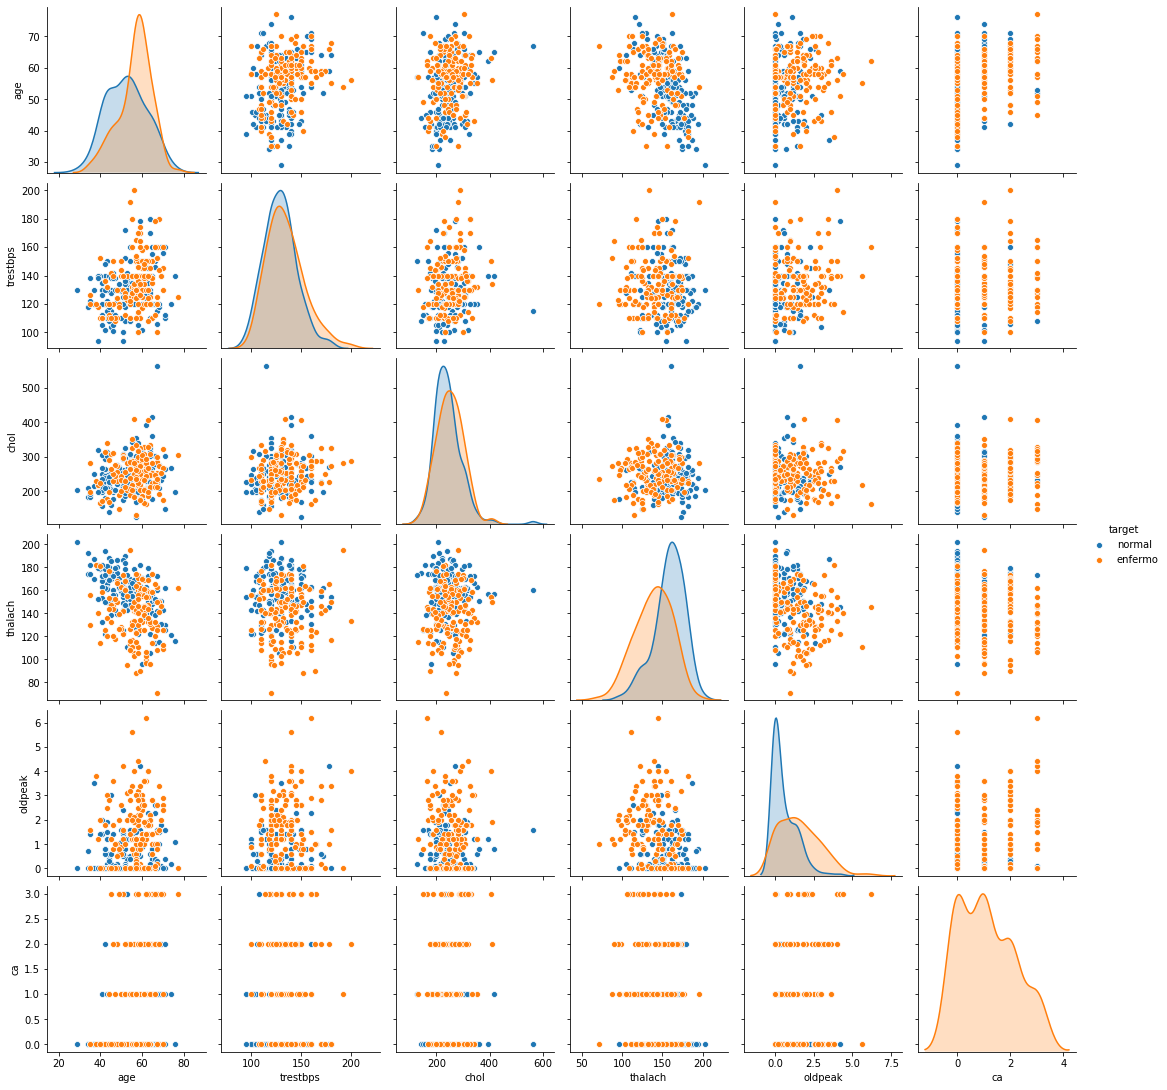

In [5]:
import seaborn as sns

no_categoric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca','target']
dff=df.loc[:, no_categoric]
dff
sns.pairplot(dff, diag_kind='kde',hue='target')

### Comentarios

#### Como se puede observar en la tabla, la unica variable que denota una separación a primera vista es thalach, que indica el pulso por minuto maximo alcanzado.

#### Segun los coeficientes de correlación de Pearson no hay correlaciones muy evidentes. Lo unico destacable sería: 
    - Correlacion inversa entre edad y thalach :-0.394563
    - Correlacion directa entre oldpeak y chol :0.038596

#### Como a simple vista es complicado separar, clusters creemos que el problema sera complicado

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

### Las variables numéricas de este conjunto son de escalas muy diferentes, (una 126 - 564 y otra 0-3) 

#### Sin embargo, la tecnica que vamos a emplear no necesita escalar los datos, puesto que trata cada variable independientemente.

#### Probamos ambas opciones (escalar o no) y obteniamos los mismos resultados

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz,plot_tree
# Definimos el random state
RANDOM_STATE=83

# Arbol decision
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Separamos datos de target
datos=df.values[:,0:13]
salida=df['target']

# Fit
clf = clf.fit(datos,salida)

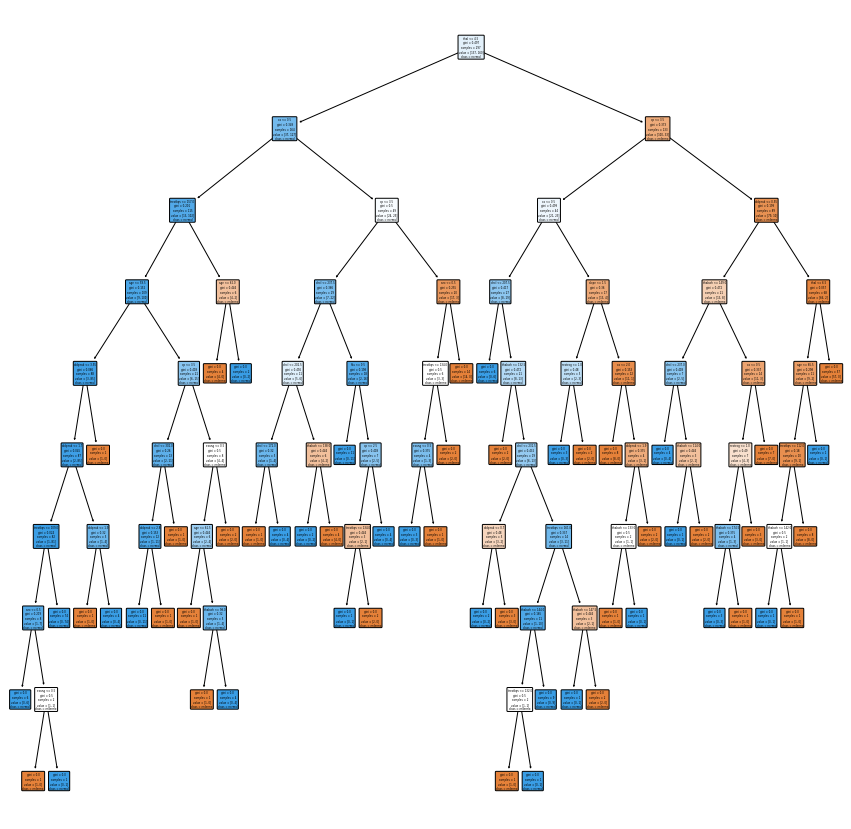

In [11]:
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(15,15))
# Quitamos target de las columnas (nos quedamos con los nombres de la columnas de datos)
col=df.columns[:13]
plot_tree(clf, filled=True, feature_names=col, class_names=['enfermo','normal'], rounded=True)
plt.show()
# En naranja enfermo en azul normal

### Probamos distintas profundidades del arbol

#### Entrenamos y validamos varios árboles con distintas profundidades máximas entre 1 y 5
#### Utilizamos la entropía como criterio de selección de variables.

In [12]:
from sklearn.model_selection import cross_validate
import numpy as np

train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas entre 1 y 5
max_depths = range(1, 6)
for md in max_depths: 
    
    # Creamos arbol de decision
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    # Segun validacion cruzada en 10 partes obtenemos su puntuacion
    scores = cross_validate(clf, datos,salida, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9139569008888143],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7608045977011495,
  0.7571264367816093])

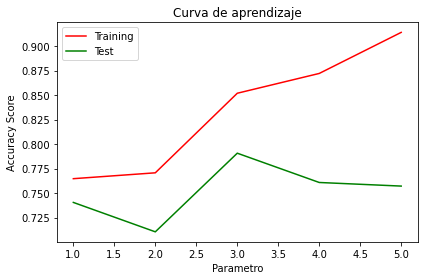

In [13]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

### El valor maximo de exactitud se obtiene con max_depth =3. Para mayores profundidades el clasificador esta sobre entrenando, y la metrica del test empeora, mientras que la de entrenamiento continua su mejora.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

### ¿Cuáles son las variables más importantes y en qué orden?
    Las variables mas importantes son las que ocupan las posiciones mas cercanas a la raíz del arbol, por orden thal, 
    ca ,age...
### ¿Hay variables del conjunto de datos que no se han usado?
    Variables usadas: thal, ca ,age,cp, exang, restecg
    Variables no utilizadas :  sex, trestbps, chol, fbs, thalach,oldpeak, slope
### ¿El árbol que hemos construido es capaz de separar las clases?
    El arbol construido no separa por completo las clases pero si las separa lo suficiente como para considerar que hace una 
    buena clasificacion
### ¿En cuál de los nodos hoja existe mayor confusión?
    El nodo hoja con mayor confusion es el que alcanzamos por la quinta rama enumeradas por orden de izquierda a derecha, 
    que presenta mayor entropia = 0.918. Con una relacion [enfermo,normal=[11,22]

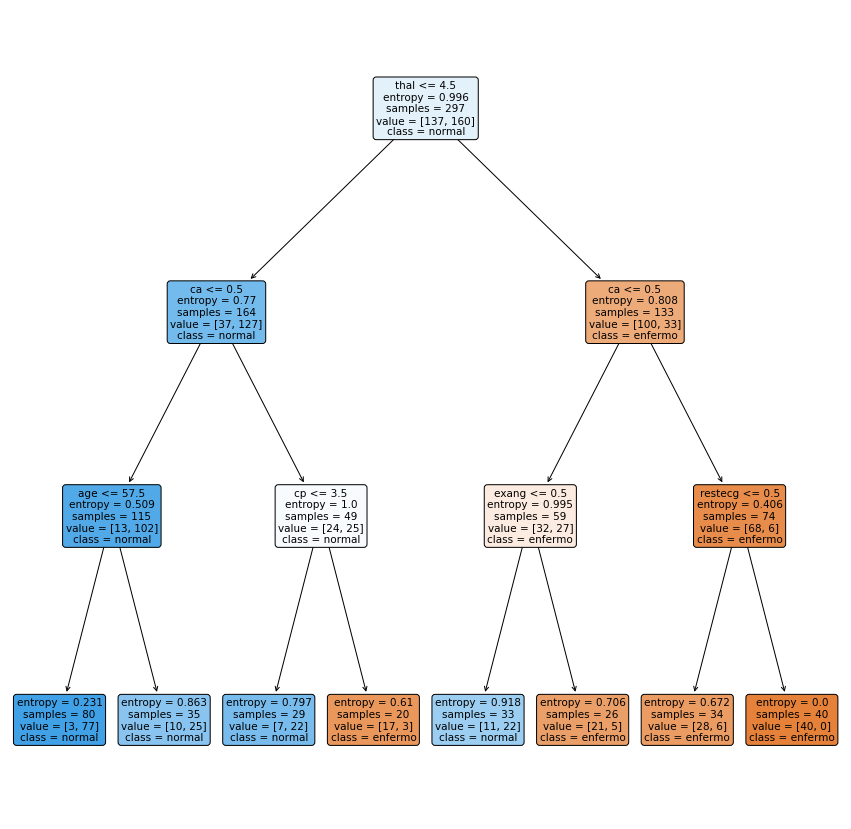

0.7906896551724139


In [14]:
# Crea un nuevo árbol de decisión con la profundidad óptima 3
max_prof=3
clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_prof, min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(datos,salida)
scores = cross_validate(clf, datos,salida, scoring='accuracy', cv=10, return_train_score=True)
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=col, class_names=['enfermo','normal'], rounded=True)
plt.show()
# En naranja enfermo en azul normal
print(np.mean(scores['test_score']))

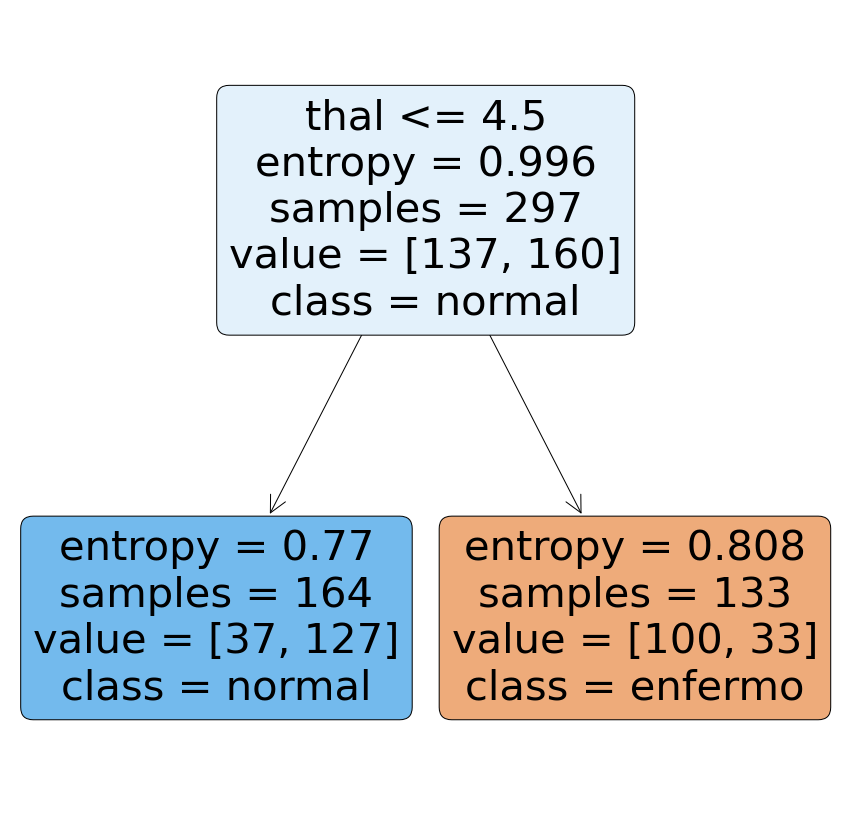

0.7404597701149426


In [16]:
# Crea un nuevo árbol de decisión con la profundidad óptima 3
max_prof=1
clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_prof, min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(datos,salida)
scores = cross_validate(clf, datos,salida, scoring='accuracy', cv=10, return_train_score=True)
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=col, class_names=['enfermo','normal'], rounded=True)
plt.show()
# En naranja enfermo en azul normal
print(np.mean(scores['test_score']))

### ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?
La tasa de aciertos con tres preguntas seria de _0.7906896551724139_

La tasa de aciertos con una preguntas seria de  _0.7404597701149426_

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [17]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Usamos la profundidad optima
max_prof=3
# Escribimos las métricas que queremos evaluar , por orden(la precisión, exhaustividad y valor F1)
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador(segun entropia y la profundidad optima)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_prof, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada en 10 partes, y obtenemos las metricas que queriamos evaluar
scores = cross_validate(clf, datos, salida, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Aplicamos prediccion segun validacion cruzada
# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, datos,salida, cv=10)

# Informe por clases
l=['enfermo','normal']
cr = classification_report(salida,predictions, target_names=l)
print(cr)

              precision    recall  f1-score   support

     enfermo       0.82      0.71      0.76       137
      normal       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



### ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?
    Como habíamos visto en el dibujo del árbol, este no separa por completo las clases.
    Observamos que en terminos generales (observando F1), el clasificador hace mejor clasificacion de la clase normal

In [19]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


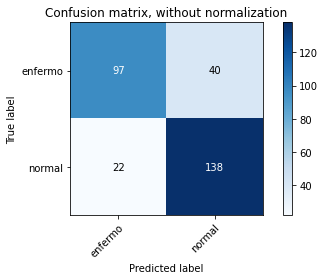

In [20]:
plot_confusion_matrix(salida, predictions, l, normalize=False)

### ¿Cómo se comporta nuestro clasificador en cada una de las clases?
Se clasifica como normal a un total de 40 pacientes enfermos (medida reflejada en la precision, que es mas baja para normal 0.78)

Sin embargo, un paciente normal en este caso 22, rara vez se clasificara como enfermo(recall de normal 0.86, mas alta que la de enfermo)

In [21]:
clf = clf.fit(datos,salida)
clase = clf.predict([[63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0]])
clase[0]

'normal'

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

## Conclusiones

### ¿cómo de fiable te parece?
No nos parece lo suficientemente fiable como para basar decisiones en las predicciones estableciadas.
### ¿crees que aportaría algo en un hospital real?
En un hospital si podría llegar a ser de utilidad para realizar una temprana y rapida clasificacion de los pacientes en función de tan solo seis variables que se usan en el arbol de decision de profundidad 3. Aportan una clasificación que permite al personal medico conocer la situacion del paciente, pero no deberian hacer uso de esta clasificacion para la toma de decisiones debido a la posible falta de fiabilidad de esta.
### Ventajas-Desventajas
Una de las ventajas de aplicar clasificadores basados en árboles de decisión se debe a que en este problema predominan las variables no categoricas, de las que no podemos obtener metricas basadas en cercanía.